In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from keras.layers import *
from keras.utils import to_categorical
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
# loading training data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# loading testing data
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# making of training data
X_train = train.drop(columns=["label"])
y_train = train.iloc[:,0]

In [6]:
# convert dataframes into numpy arrays
X_train = X_train.values
y_train = y_train.values
# normalized data, so to easily convert into images
X_train = X_train/255.

In [7]:
X_train =X_train.reshape((-1,28,28,1))

In [8]:
X_train[0].shape

(28, 28, 1)

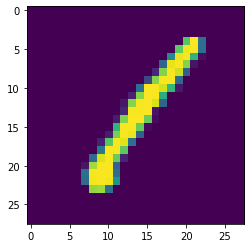

In [9]:
plt.imshow(X_train[0])

In [10]:
y_train[3]

4

In [11]:
# making X_test
X_test = test.values
# normalize data
X_test = X_test/255.

In [12]:
X_test = X_test.reshape((-1,28,28,1))

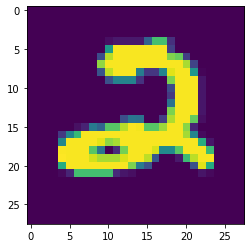

In [13]:
plt.imshow(X_test[0])

In [14]:
# converting y_train to one hot vector
y_train = to_categorical(y_train)

In [15]:
# creating MoDEL
model = Sequential()

In [16]:
model.add( Conv2D( filters=4,kernel_size=(5,5),activation="relu",input_shape = (28,28,1) ) )
model.add( AveragePooling2D( pool_size=(2,2) ) ) 
model.add( Conv2D( filters=8, kernel_size=(7,7), activation="relu"))
model.add( AveragePooling2D( pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense( units=10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           1576      
_________________________________________________________________
average_pooling2d_2 (Average (None, 3, 3, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                730       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
hist = model.fit(X_train,y_train,batch_size=16,epochs=5,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 40s 1ms/step - loss: 0.4505 - accuracy: 0.8611 - val_loss: 0.2232 - val_accuracy: 0.9356
Epoch 2/5
33600/33600 [==============================] - 24s 703us/step - loss: 0.1993 - accuracy: 0.9406 - val_loss: 0.1553 - val_accuracy: 0.9520
Epoch 3/5
33600/33600 [==============================] - 14s 403us/step - loss: 0.1480 - accuracy: 0.9572 - val_loss: 0.1314 - val_accuracy: 0.9605
Epoch 4/5
33600/33600 [==============================] - 14s 420us/step - loss: 0.1205 - accuracy: 0.9645 - val_loss: 0.1043 - val_accuracy: 0.9679
Epoch 5/5
33600/33600 [==============================] - 18s 540us/step - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.0979 - val_accuracy: 0.9720


In [19]:
h = hist.history
print(h)

{'val_loss': [0.22316600159963682, 0.15534734034467312, 0.13136875044554472, 0.10429931428194755, 0.0978790707957177], 'val_accuracy': [0.9355952143669128, 0.9520238041877747, 0.9604762196540833, 0.9678571224212646, 0.9720237851142883], 'loss': [0.45045244899489695, 0.19925927805337346, 0.1480231293582446, 0.12048487277601712, 0.10674624811322983], 'accuracy': [0.8610714, 0.940625, 0.95717263, 0.9645238, 0.96818453]}


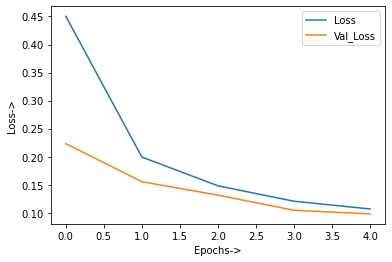

In [23]:
# plot loss
plt.plot(h["loss"], label = "Loss")
plt.plot(h["val_loss"], label = "Val_Loss")
plt.legend()
plt.xlabel("Epochs->")
plt.ylabel("Loss->")
plt.show()

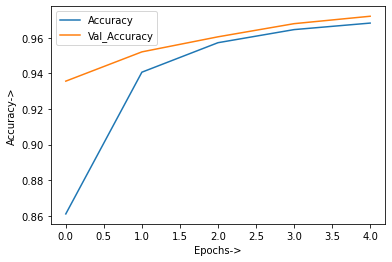

In [24]:
# plot accuracy
plt.plot(h["accuracy"], label = "Accuracy")
plt.plot(h["val_accuracy"], label = "Val_Accuracy")
plt.legend()
plt.xlabel("Epochs->")
plt.ylabel("Accuracy->")
plt.show()

In [26]:
training = model.evaluate(X_train,y_train)

42000/42000 [==============================] - 3s 71us/step


In [27]:
loss, acc = training

In [29]:
print("Loss-> ", loss)
print("Accuracy-> ", acc*100)

Loss->  0.09782035129251225
Accuracy->  97.06666469573975


In [30]:
y_pred = model.predict(X_test)

In [33]:
pred = np.argmax(y_pred, axis=1)

In [34]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [35]:
model.save("MNIST-Model(acc-97%).h5")

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
model = load_model("MNIST-Model(acc-97%).h5")

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img = cv2.imread("image1.jpg")

In [8]:
img.shape

(171, 197, 3)

In [12]:
img = cv2.resize(img,(28,28))

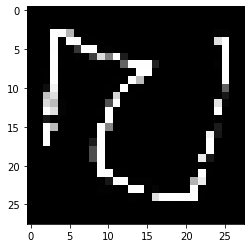

In [15]:
plt.imshow(img)

In [19]:
from keras.preprocessing import image

In [66]:
img = image.load_img("image1.jpg")

imgs = image.img_to_array(img)

imgs.shape

imgs = np.resize(imgs,(1,28,28,1))

imgs.shape

y = model.predict(imgs)
print(y)

np.argmax(y, axis = 1)

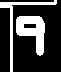

In [73]:
img